**Name: Christ-Brian Amedjonekou**  
**Date: 2/20/2019**  
**MAT 4880-D692 (Math Modeling II) Krill vs Whale Problem; SIS Model HW**  
**Spring 2019, Section: D692, Code: 36561**  
**Instructor: Johann Thiel**

# Blue Whale, Krill Coexistance Problem

**7. One of the favorite foods of the blue whale is called krill. These tiny shrimp-like creatures are devoured in massive amounts to provide the principle food source for the blue whales. The maximum sustainable population for krill is 500 tons/acre. In the absence of predators, in uncrowded conditions, the growth rate of the krill population is 25%. The presence of 500 tons/acre of krill increases the blue whale population by 2% per year, and the presence of 150000 blue whales decreases krill population growth rate 10% per year.**

1. Determine whether the whales and the Krill can coexist in equillibrium. Use the five-step, and the model as a dynamical system in steady state  

2. Draw the vector field for this problem. Classify each equiillibrium point in the state space as stable or unstable

3. Describe what happens to the two populations overtime. Assume we start off w/ 5000 blue whales and 750 ton/acre krill 

4. How sensitive are your conclusions in part (3) to the assumption of a 25% growth of per year for krill.


**Variables**

$B = \text{number of blue whales}$  
$K = \text{number of krill}$  
$g_B = \text{growth rate for blue whales}$  
$g_K = \text{growth rate for krill}$  
$c_B = \text{competition term for blue whales}$  
$c_K = \text{competition term for krill}$  

**Assumptions**

$g_B = 0.05B\Big(1 - \dfrac{B}{150000}\Big)$  

$g_K = 0.25B\Big(1 - \dfrac{B}{400000}\Big)$   

$c_B = \alpha BF; \text{ where } \alpha = \frac{0.10}{150000}$  

$c_K = \alpha BF; \text{ where } \alpha = \frac{0.02}{500}$ 

$\frac{dB}{dt} = g_B - c_B$  

$\frac{dF}{dt} = g_K - c_K$  

$B, K \geq 0$

**Objective**

Find the equillibrium points and whether they're stable

### Modules

In [1]:
# Modules being called
import math as m
import numpy as np
from sympy.solvers import solve
import sympy as sp
from matplotlib import pyplot as plt
import pandas as pd

### Variables

In [67]:
# sympy.symbols() allows us to declare variables symbolically instead of numerically. 
# They remain as unknowns, which we solve for using other functions from the sympy library
# For analytical solutions
B,K = sp.symbols('B K')

# Creates dynamical system (involving the the differential equations): 
# g_Ba, g_Ka are the growth rates the blue whale and krill populations respectively
g_Ba, g_Ka = 0.05*B*(1-B/150000), 0.25*K*(1-K/500)

# c_Ba, c_Ka are the competition terms for the blue whale and krill populations respectively
c_Ka, c_Ba = (0.10/150000)*B*K, (0.02/500)*B*K

# dBdta, dKdta is the dynamical system featuring the blue whale and krill populations.
dBdta, dKdta = g_Ba + c_Ba, g_Ka - c_Ka

In [68]:
# init_printing() displays LaTeX version of outputs; 'quiet= True' stops 
# init_printing from printing messages regarding its status

sp.init_printing()

# Solution to the system (Equillibrium Points)

solution = solve([dBdta, dKdta], B, K)

***The following is the Equillibrium Point to the system in terms of 'a'.***

### Equillibrium Points

In [69]:
solution

### Nullclines

In [70]:
solve(dBdta, B)[0]

In [71]:
solve(dBdta, B)[1]

In [72]:
solve(dKdta, K)[0]

In [73]:
solve(dKdta, K)[1]

### Functions

In [76]:
def dB_dta(blue, krill):
    """This function is the numerical version of the symbolic rendition of dB/dt above"""
    g_Ba1 = 0.05*blue*(1-blue/150000)
    c_Ba1 = (0.02/500)*blue*krill
    dBdta1 = g_Ba1 + c_Ba1
    return dBdta1

    
def dK_dta(blue, krill):
    """This function is the numerical version of the symbolic rendition of dK/dt above"""
    g_Ka1 = 0.25*krill*(1-krill/500)
    c_Ka1 = (0.10/150000)*blue*krill
    dKdta1 = g_Ka1 - c_Ka1
    return dKdta1


def sensitivityAnalysis(blue= 5000, krill= 750):
    """Outputs the sensitivity analysis of krill in table form. 
    Using different growth rates."""
    growth = np.arange(.15, .35, .01)
    dKdta2 = growth*krill*(1-krill/500) - (0.10/150000)*blue*krill
    krillChange = dKdta2 
    dict1 = {'Growth1': growth,'dK/dt': krillChange}
    df1 = pd.DataFrame.from_dict(dict1)
    return df1

def sensitivityAnalysisGraph(blue= 5000, krill= 750, loc= 10):
    fig, ax1 = plt.subplots()
    days = np.arange(0, 5, 1)
    loss = sensitivityAnalysis()['dK/dt'].iloc[loc] * days
    ax1.plot(days, loss, color= 'r', linestyle= '--', lw= 2, label= 'Krill L/D')
    ax1.set(xlabel= 'Days', ylabel= 'Loss', title= 'Krill Sensitivity')
    ax1.legend('upper right')
    return ax1

### Plot 

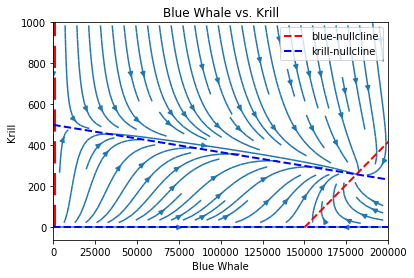

In [87]:
%matplotlib inline 

# Part 1: Creates the grid for the plot
fig, ax1 = plt.subplots()
x, y = np.linspace(0,200000), np.linspace(0,1000)
X, Y = np.meshgrid(x, y)

# Part 2: Creates the nullclines
b, k = x, y
B1 = 0 * k
B2 = 120.0*k + 150000.0
K1 = 0 * b
K2 = -0.00133333333333333*b + 500.0

# Part 3: Create the vector plot for dB/dt = 0; dK/dt = 0
U, V = dB_dta(X, Y), dK_dta(X, Y)

# Part 4: Plots the nullclines 
ax1.plot(B1, k, color= "r", linestyle= '--', linewidth= 6)
ax1.plot(B2, k, color= "r", linestyle= '--', linewidth= 2, label= 'blue-nullcline')
ax1.plot(b, K1, color= "b", linestyle= '--', linewidth= 2, label= 'krill-nullcline')
ax1.plot(b, K2, color= "b", linestyle= '--', linewidth= 2)

# Part 5: Plots the streamplot

ax1.streamplot(X, Y, U, V)

# Part 6: Creates the legend, axis names, title, etc.
ax1.set(xlabel= 'Blue Whale', ylabel= 'Krill', xlim= (0,200000), title= 'Blue Whale vs. Krill')
ax1.legend(loc= 'upper right')

### Answer to the Questions

1. Determine whether the whales and the Krill can coexist in equillibrium. Use the five-step, and the model as a dynamical system in steady state.

    * **Yes they can coexist. Refer to graph above. You see the vectors in the vector plot points towards the equillibrium point. (This was answered last HW). Additionally the equillibrium is positive.** 

  
2. Draw the vector field for this problem. Classify each equiillibrium point in the state space as stable or unstable.

    * **Stable Equillibrium: $\big(181034.482758621,258.620689655172\big)$ as the vectors point towards it.**
    * **Unstable Equillibrium: $\big[(0.0,0.0),(0.0,500.0),(150000.0,0.0)\big]$ as the vectors point away from them.**


3. Describe what happens to the two populations overtime. Assume we start off w/ 5000 blue whales and 750 ton/acre krill 

    * **They move towards the equillibrium point $\big(181034.482758621,258.620689655172\big)$. The whale population increases substantially; the krill population decreases substantially as well.**


4. How sensitive are your conclusions in part (3) to the assumption of a 25% growth of per year for krill.

    * **View answer below**

***The growth rate of 25% yields a decrease/loss ('-' sign) of approx. 97 ton/acres of krill***

In [11]:
sensitivityAnalysis().iloc[10]

Growth1     0.25
dK/dt     -96.25
Name: 10, dtype: float64

***Also refer to graph***

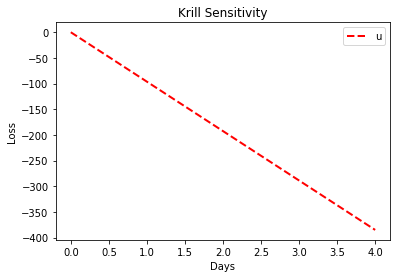

In [22]:
sensitivityAnalysisGraph()

***If the growth rate where changed, you'd still experience a decrease/loss ('-' sign) of krill, but the amount per time (I did days) would be different. See below:***

#### Loss at different growth rates

In [58]:
for i in range(20):
    print('For a {} growth rate, have a loss of {} tons/acre per day'.format(round(sensitivityAnalysis()['Growth1'].iloc[i], 2), 
                                                                         round(-1*sensitivityAnalysis()['dK/dt'].iloc[i],2)))

For a 0.15 growth rate, have a loss of 58.75 tons/acre per day
For a 0.16 growth rate, have a loss of 62.5 tons/acre per day
For a 0.17 growth rate, have a loss of 66.25 tons/acre per day
For a 0.18 growth rate, have a loss of 70.0 tons/acre per day
For a 0.19 growth rate, have a loss of 73.75 tons/acre per day
For a 0.2 growth rate, have a loss of 77.5 tons/acre per day
For a 0.21 growth rate, have a loss of 81.25 tons/acre per day
For a 0.22 growth rate, have a loss of 85.0 tons/acre per day
For a 0.23 growth rate, have a loss of 88.75 tons/acre per day
For a 0.24 growth rate, have a loss of 92.5 tons/acre per day
For a 0.25 growth rate, have a loss of 96.25 tons/acre per day
For a 0.26 growth rate, have a loss of 100.0 tons/acre per day
For a 0.27 growth rate, have a loss of 103.75 tons/acre per day
For a 0.28 growth rate, have a loss of 107.5 tons/acre per day
For a 0.29 growth rate, have a loss of 111.25 tons/acre per day
For a 0.3 growth rate, have a loss of 115.0 tons/acre per d

# Discrete SIR Model

#### Variables

$t = \text{time in weeks}$  
$S = \text{Susceptible Population}$  
$I = \text{Infected Population}$  
$R = \text{Recovered Population}$  
$\Delta S = \text{change in Susceptible Population}$  
$\Delta I = \text{change in Infected Population}$  
$\Delta R = \text{change in Recoved Population}$  


#### Assumptions

$S + I + R = 100000$  

$\Delta S + \Delta I + \Delta R = 0$  
$\Delta S = -\beta SI$  
$\Delta I = \beta SI - \zeta I $  
$\Delta R = \zeta I$  

***Between Last Week and this week***

$\text{Let } R_0 = 30000$  
$\text{Let } \zeta = 0.30$  
$\text{Let } I_0 = 18$  
$\text{Let } S_0 = 70000 - 18 = 69982$  
$\Delta I_0 = 40 = \beta (69982)(18) - (0.30)(18)$   

$\text{Let } \beta = \cfrac{40 - (0.30)(18)}{(69982)(18)}$


#### Objective

* Find eventual number of people who will get infected
* Estimate maximum number of cases in one week
* Conduct Sensitivety Analysis to investigate effect of any assumptions made not based on hard data
* Perform sensitivity analysis for number of cases (18) reported last week
    * Thought that in early weeks epidemic is underreported

### Functions

In [24]:
def beta(susceptibles, infected, zeta = 0.30):
    """Calculated Beta, the proportionality constant used in change for susceptibles and infected"""
    i_0 = 40
    return (i_0 + zeta*infected)/(susceptibles * infected)


def delta_S(susceptibles, infected, beta):
    """Change in Susceptibles"""
    return - beta * susceptibles * infected


def delta_I(susceptibles, infected, beta, zeta= 0.30):
    """Change in Infected"""
    return (beta * susceptibles * infected) - (zeta * infected)


def delta_R(infected, zeta= 0.30):
    """Change in Recovered"""
    return (zeta * infected)

### Variables

In [15]:
# My initial variables for the model 
s_0, i_0 = 69982, 18

In [19]:
beta_const = beta(s_0, i_0)
beta_const

### Objective

* Find eventual number of people who will get infected

In [42]:
infected_list = [i_0]
for i in range(0, 3):
    newInfected = infected_list[i] + delta_I(s_0, i_0, beta_const)
    infected_list.append(newInfected)

data1 = {'Weeks': np.arange(0, 4, 1), '# of Infected/Week': np.array(infected_list)}
df1 = pd.DataFrame.from_dict(data1)
df1

,Weeks,# of Infected/Week
0,0,18.0
1,1,58.0
2,2,98.0
3,3,138.0


In [45]:
print('Eventual number of cases of infected is: {}'.format(df1['# of Infected/Week'].iloc[3]))

Eventual number of cases of infected is: 138.0


* Estimate maximum number of cases in one week

In [47]:
print('Max number of cases of infected in 1 week is: {}'.format(delta_I(s_0, i_0, beta_const)))

Max number of cases of infected in 1 week is: 40.0


* Conduct Sensitivety Analysis to investigate effect of any assumptions made not based on hard data
* Perform sensitivity analysis for number of cases (18) reported last week
    * Thought that in early weeks epidemic is underreported